## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
mouse_metadata.describe()

,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000


In [5]:
study_results.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659
std,14.079460,8.894722,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.951474,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [6]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

In [7]:
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice.
combined_df["Mouse ID"].describe()

count     1893
unique     249
top       g989
freq        13
Name: Mouse ID, dtype: object

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[combined_df.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows=combined_df[combined_df.duplicated(['Mouse ID','Timepoint'], inplace=True)]
duplicaterows

TypeError: duplicated() got an unexpected keyword argument 'inplace'

In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df=combined_df.drop_duplicates(['Mouse ID', 'Timepoint'])

In [ ]:
# Checking the number of mice in the clean DataFrame.
combined_df["Mouse ID"].describe()

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_regimen=combined_df.groupby(['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean=grouped_regimen['Tumor Volume (mm3)'].mean()
tumor_volume_median=grouped_regimen['Tumor Volume (mm3)'].median()
tumor_volume_variance=grouped_regimen['Tumor Volume (mm3)'].var()
tumor_volume_std=grouped_regimen['Tumor Volume (mm3)'].std()
tumor_volume_sem=grouped_regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
grouped_regimen_df=pd.DataFrame({"Tumor Volume Mean": tumor_volume_mean,
                     "Tumor Volume Median": tumor_volume_median,
                     "Tumor Volume Variance": tumor_volume_variance,
                     "Tumor Volume Standard Deviation": tumor_volume_std,
                     "Tumor Volume SEM": tumor_volume_sem})
grouped_regimen_df


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grouped_regimen_df2=combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
grouped_regimen_df2

## Bar and Pie Charts

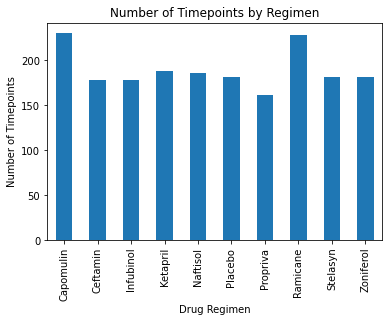

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen_group=combined_df.groupby('Drug Regimen')
count_timepoints=regimen_group['Timepoint'].count()
count_timepoints

count_chart=count_timepoints.plot(kind='bar')
count_chart.set_title("Number of Timepoints by Regimen")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Timepoints")

plt.show()

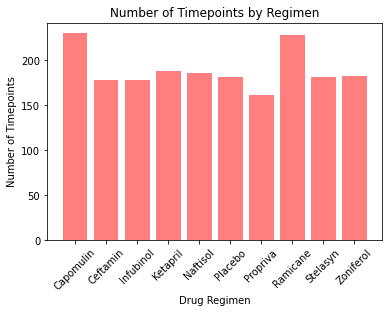

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(count_timepoints))
tick_locations = [value for value in x_axis]
tick_label=list(count_timepoints.keys())

plt.bar(x_axis, count_timepoints, tick_label=tick_label,color='r', alpha=0.5, align="center")

plt.xticks(rotation=45)
plt.title("Number of Timepoints by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

plt.show()

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


([<matplotlib.patches.Wedge at 0x24eb6b0bbe0>,
 [Text(-1.0999781124353174, 0.0069391759767658615, 'Female'),
  Text(1.0999781124353174, -0.006939175976765996, 'Male')],
 [Text(-0.5999880613283548, 0.003785005078235924, '49.8%'),
  Text(0.5999880613283548, -0.0037850050782359972, '50.2%')])

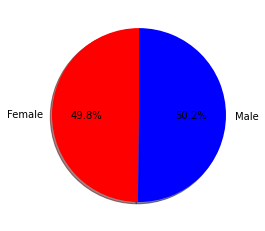

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count=combined_df.groupby('Sex')['Mouse ID'].nunique()
gender_data=gender_count.keys()
count_data=gender_count
colors = ["red", "blue"]
plt.pie(count_data, labels=gender_data, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
